In [80]:
import numpy as np
import pandas as pd
from scipy.fft import fft, ifft
import cmath

from processing_func import from_S_to_T, from_T_to_S
from file_opener import run

In [81]:
%matplotlib widget
import matplotlib.pyplot as plt

In [82]:
###de_embadding = False # указать, нужен или не нужен
time_gating = True # указать, нужен или не нужен

### Импорт сырых данных из .s2p файла и перевод их в комплексные числа

In [83]:
data_object = pd.read_csv('C:\\Users\\isvoropaev\Desktop\\python_codes\\post_processing_RIS\\5sept\\structure_0deg.s2p', sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                names=['Frequency', 'ReS11', 'ImS11', 'ReS21', 'ImS21', 'ReS12', 'ImS12', 'ReS22', 'ImS22'])

data_screen = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\5sept\\screen_0deg.s2p', sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                names=['Frequency', 'ReS11', 'ImS11', 'ReS21', 'ImS21', 'ReS12', 'ImS12', 'ReS22', 'ImS22'])

data_free = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\5sept\\free_0deg.s2p', sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                names=['Frequency', 'ReS11', 'ImS11', 'ReS21', 'ImS21', 'ReS12', 'ImS12', 'ReS22', 'ImS22'])

In [84]:
data_free.head() # Смотрим корректность импорта данных

,Frequency,ReS11,ImS11,ReS21,ImS21,ReS12,ImS12,ReS22,ImS22
0,2.000000e+10,-0.138052,-0.149771,0.001386,0.001302,0.002241,0.000560,0.151002,-0.060155
1,2.000125e+10,-0.127607,-0.150201,0.001340,0.001213,0.002243,0.000811,0.155953,-0.054217
2,2.000250e+10,-0.116373,-0.149969,0.001504,0.001155,0.001967,0.001509,0.149451,-0.047504
3,2.000375e+10,-0.107094,-0.149412,0.001428,0.001212,0.001392,0.001152,0.143560,-0.047194
4,2.000500e+10,-0.095812,-0.147881,0.001445,0.001247,0.001602,0.001453,0.140256,-0.045156


Перевод данных в вид комплексных чисел

In [85]:
for dataset in [data_object, data_screen, data_free]: # это массив из указателей на соответствующие
    dataset['s11']=dataset['ReS11']+1j*dataset['ImS11']
    dataset['s21']=dataset['ReS21']+1j*dataset['ImS21']
    dataset['s12']=dataset['ReS12']+1j*dataset['ImS12']
    dataset['s22']=dataset['ReS22']+1j*dataset['ImS22']

Удаление исходных колонок

In [86]:
data_object = data_object.drop(['ReS11', 'ImS11', 'ReS21', 'ImS21', 'ReS12', 'ImS12', 'ReS22', 'ImS22'], axis=1)
data_screen = data_screen.drop(['ReS11', 'ImS11', 'ReS21', 'ImS21', 'ReS12', 'ImS12', 'ReS22', 'ImS22'], axis=1)
data_free = data_free.drop(['ReS11', 'ImS11', 'ReS21', 'ImS21', 'ReS12', 'ImS12', 'ReS22', 'ImS22'], axis=1)

In [87]:
data_object.head() # просмотр нового датасета

,Frequency,s11,s21,s12,s22
0,2.000000e+10,-0.169583-0.244406j,-0.002316+0.002801j,-0.001461+0.003646j,0.157706-0.047666j
1,2.000125e+10,-0.165425-0.242934j,-0.002282+0.002986j,-0.001178+0.003523j,0.147657-0.050402j
2,2.000250e+10,-0.160434-0.238956j,-0.002220+0.003241j,-0.000805+0.001999j,0.149838-0.041710j
3,2.000375e+10,-0.156183-0.235083j,-0.001867+0.003436j,-0.001725+0.004843j,0.146745-0.038999j
4,2.000500e+10,-0.151888-0.229889j,-0.001585+0.003585j,0.000452+0.003314j,0.142873-0.045089j


Создаем переменные, с которыми будем непосредственно работать (массивы формата `pd.Series`)

In [88]:
frequency = data_object['Frequency']

s11_object = data_object['s11']
s21_object = data_object['s21']

s11_screen = data_screen['s11']
s21_screen = data_screen['s21']

s11_free = data_free['s11']
s21_free = data_free['s21']

### Предпросмотр графиков необработанных файлов

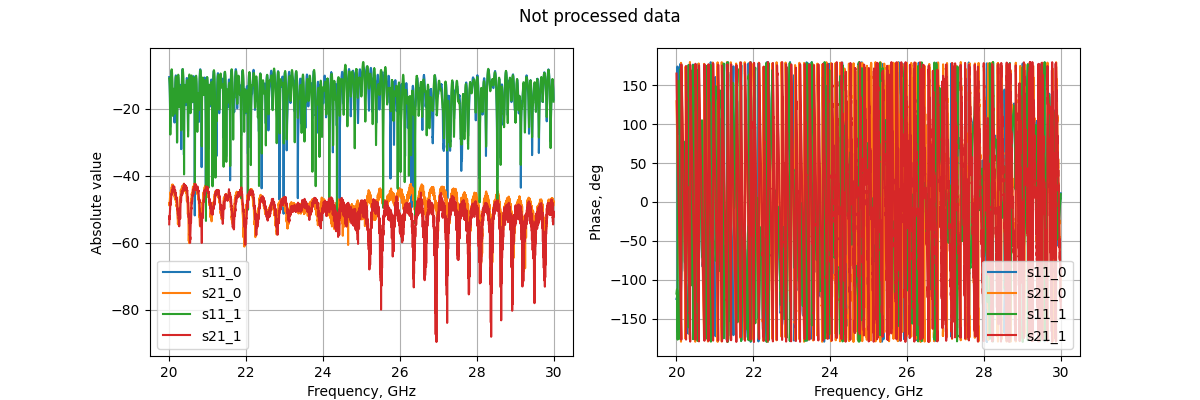

In [89]:
s_par = ['s11', 's21'] # Вести сюда названия S-параметров, которые нужны на графике в формате 'sij'
data = [data_object, data_screen] # Ввести сюда какие измерения нужны


'''Дальше  не трогать!!!'''
fig = plt.figure(figsize=(12,4))

ax_1 = fig.add_subplot(121)
ax_2 = fig.add_subplot(122)
for i, dataset in enumerate(data):
    for elem in s_par:
        ax_1.plot(dataset['Frequency']*1e-9, 20*np.log10(dataset[elem].apply(abs).to_numpy()), label=elem+'_'+str(i))
        ax_2.plot(dataset['Frequency']*1e-9, np.degrees(dataset[elem].apply(cmath.phase)), label=elem+'_'+str(i))

ax_1.set_xlabel("Frequency, GHz")
ax_1.set_ylabel("Absolute value")
ax_1.legend()
ax_1.grid()

ax_2.set_xlabel("Frequency, GHz")
ax_2.set_ylabel("Phase, deg")
ax_2.legend()
ax_2.grid()


fig.suptitle('Not processed data')
#plt.tight_layout()
plt.show()

### Time-Gating

In [90]:
N_fft = 2 ** 22 # количиство точек во временной области
# Должно иметь степень двойки для большей скорости и быть большем, чем количество частотных точек
T_max = 1 / (frequency[1]-frequency[0]) # продолжительность измеряемого импульса, определяется из количества измеряемых частотных точек
print(T_max)

8e-07


In [91]:
time = T_max*np.linspace(0, 1 + T_max, N_fft) # набор точек во временной области
time[-1] # последний элемент

8.0000064e-07

Просмотр S-параметров во временной области

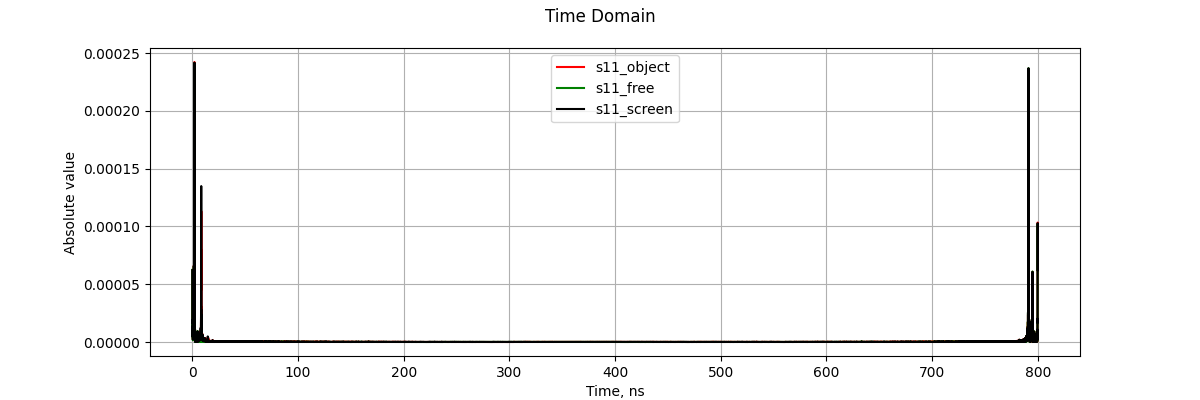

In [92]:
# param = s11_object
# name = 's11_object'

fig2 = plt.figure(figsize=(12,4))

ax_1 = fig2.add_subplot(111)
ax_1.plot(time*1e9, abs(ifft(s11_object.to_numpy(), n=N_fft)),'r', label='s11_object')
ax_1.plot(time*1e9, abs(ifft(s11_free.to_numpy(), n=N_fft)),'g', label='s11_free')
ax_1.plot(time*1e9, abs(ifft(s11_screen.to_numpy(), n=N_fft)),'k', label='s11_screen')

ax_1.set_xlabel("Time, ns")
ax_1.set_ylabel("Absolute value")
ax_1.legend()
ax_1.grid()


fig2.suptitle('Time Domain')
plt.show()

In [93]:
gate_s11_object = np.array([[0, 7], [10, 900]])*1e-9 # заполнить промежутками времени, которые необходимо вырезать в нс
gate_s21_object = np.array([[], []])*1e-9

gate_s11_screen = np.array([[0,7], [10, 900]])*1e-9 
gate_s21_screen = np.array([[], []])*1e-9

gate_s11_free = np.array([[0, 7], [10, 900]])*1e-9 
gate_s21_free = np.array([[], []])*1e-9

In [94]:
def time_gate_s_param(gate: np.ndarray, s_par: pd.core.series.Series, n=N_fft, time=time):
    s = s_par.to_numpy()
    time_dom_s = pd.Series(ifft(s, n=n))
    for k in range(gate.shape[0]):
        if len(gate[k, :]) != 0:
            numbers = (time >= gate[k, 0]) & (time <= gate[k, 1])
            time_dom_s.loc[numbers] = 0
            #print(time_dom_s.head())
    s_new = fft(time_dom_s.to_numpy())
    s_new = s_new[0:len(frequency)]
    return pd.Series(s_new)

Проведение тайм-гейтинга

In [95]:
if time_gating == True:
    s11_object = time_gate_s_param(gate=gate_s11_object, s_par=s11_object)
    s21_object = time_gate_s_param(gate=gate_s21_object, s_par=s21_object)
    s11_screen = time_gate_s_param(gate=gate_s11_screen, s_par=s11_screen)
    s21_screen = time_gate_s_param(gate=gate_s21_screen, s_par=s21_screen)
    s11_free = time_gate_s_param(gate=gate_s11_free, s_par=s11_free)
    s21_free = time_gate_s_param(gate=gate_s21_free, s_par=s21_free)

In [96]:
s11_object.shape # проверка, что число точек осталось таким же, как в исходных данных

(8001,)

Просмотр S-параметров после тайм-гейтинга

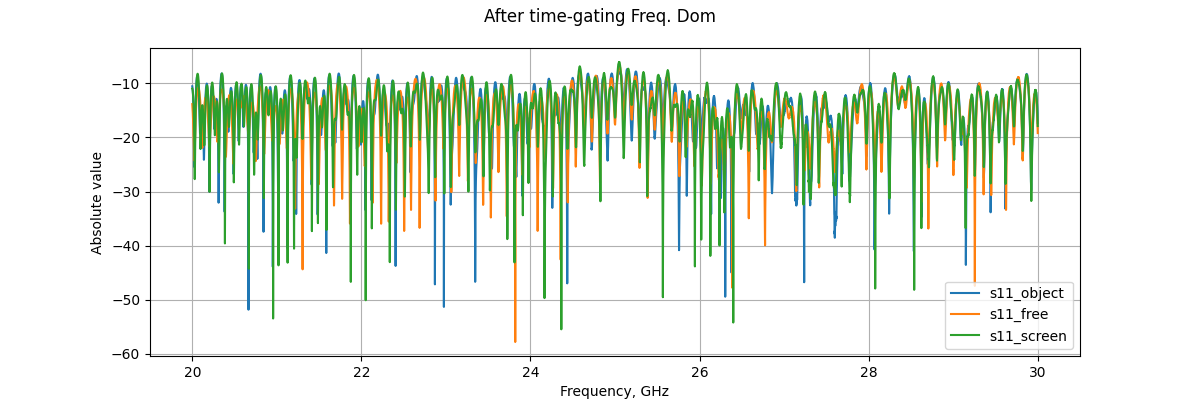

In [97]:
param = [s11_object, s11_free, s11_screen]
name = ['s11_object', 's11_free', 's11_screen']

fig3 = plt.figure(figsize=(12,4))

ax_1 = fig3.add_subplot(111)

for i, s_par in enumerate(param):
    ax_1.plot(frequency*1e-9, 20*np.log10(s_par.apply(abs).to_numpy()), label=name[i])
ax_1.set_xlabel("Frequency, GHz")
ax_1.set_ylabel("Absolute value")
ax_1.legend()
ax_1.grid()


fig3.suptitle('After time-gating Freq. Dom')
plt.show()

### Итоговые выражения для коэффициента отражения

In [98]:
Gamma = -(s11_object - s11_free) / (s11_screen - s11_free)

### Импорт графиков из CST

In [99]:
reflecting_coef_30deg_TE = pd.read_csv('ND_struct_0deg_s11_TE.txt', sep='\t', header=None, skiprows=3, 
                names=['Frequency', 'ReSz11', 'ImSz11'])

In [100]:
#reflecting_coef_30deg_TE['Frequency'] = 1e9*reflecting_coef_30deg_TE['Frequency']
reflecting_coef_30deg_TE['Sz11'] = reflecting_coef_30deg_TE['ReSz11'] + 1j*reflecting_coef_30deg_TE['ImSz11']

In [101]:
reflecting_coef_30deg_TE = reflecting_coef_30deg_TE.drop(['ReSz11', 'ImSz11'], axis=1)

In [102]:
reflecting_coef_30deg_TE.head()

,Frequency,Sz11
0,20.00,-0.781365+0.619350j
1,20.01,-0.780787+0.620059j
2,20.02,-0.780207+0.620770j
3,20.03,-0.779624+0.621482j
4,20.04,-0.779039+0.622196j


In [103]:
cst_freq = reflecting_coef_30deg_TE['Frequency']
cst_Gamma = reflecting_coef_30deg_TE['Sz11']

### Сравенние графиков с результатами CST

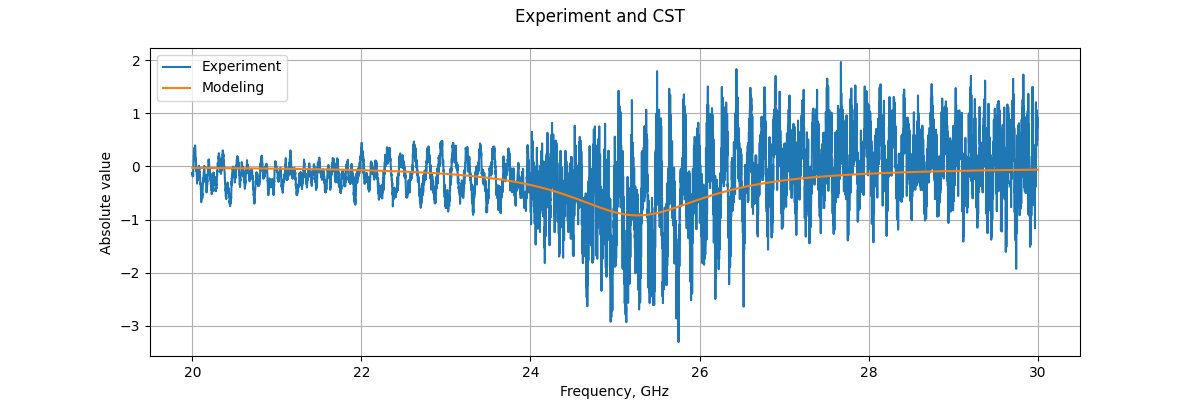

In [104]:
fig4 = plt.figure(figsize=(12,4))

ax_1 = fig4.add_subplot(111)

ax_1.plot(frequency*1e-9, 20*np.log10(Gamma.apply(abs).to_numpy()), label='Experiment')
ax_1.plot(cst_freq, 20*np.log10(cst_Gamma.apply(abs).to_numpy()), label='Modeling')
ax_1.set_xlabel("Frequency, GHz")
ax_1.set_ylabel("Absolute value")
ax_1.legend()
ax_1.grid()


fig4.suptitle('Experiment and CST')
plt.show()

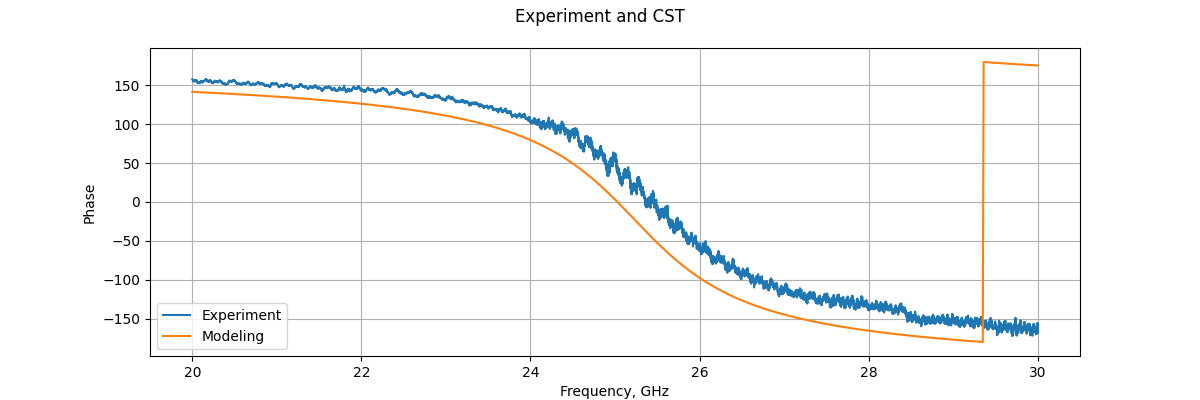

In [105]:
fig4 = plt.figure(figsize=(12,4))

ax_1 = fig4.add_subplot(111)

ax_1.plot(frequency*1e-9, np.degrees(pd.Series(Gamma).apply(cmath.phase).to_numpy()), label='Experiment')
ax_1.plot(cst_freq, np.degrees(cst_Gamma.apply(cmath.phase).to_numpy()), label='Modeling')
ax_1.set_xlabel("Frequency, GHz")
ax_1.set_ylabel("Phase")
ax_1.legend()
ax_1.grid()


fig4.suptitle('Experiment and CST')
plt.show()